### The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

#### Notebook by *Abhishek Verma*

## Loading Pandas and Numpy For Computations

In [ ]:
import pandas as pd
import numpy as np

read the dataset csv file 

In [2]:
dataset=pd.read_csv("Desktop/bank-additional-full.csv",sep=";")

In [3]:
dataset.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Check if there is any null values or not

In [4]:
dataset.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

Since all values are false , therefore there is no null values present in the dataset

In [5]:
dataset.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

# Data Exploration

In [31]:
dataset.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,256.563000,2.475117,927.294374,0.148651,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,248.913974,2.300843,180.035954,0.402608,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,962.475454,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,962.475454,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,962.475454,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,2486.000000,20.000000,962.475454,2.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

## load necessary libraries

In [8]:
# Load libraries
%matplotlib inline
import matplotlib.pyplot as plt
#setting dimension of graph
plt.rcParams["figure.figsize"]= (12, 7)

import seaborn as sns

from pandas.tools.plotting import scatter_matrix

from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.preprocessing import Imputer
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [9]:
print(dataset.head())

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon ...         1    999         0  nonexistent          1.1   
1   may         mon ...         1    999         0  nonexistent          1.1   
2   may         mon ...         1    999         0  nonexistent          1.1   
3   may         mon ...         1    999         0  nonexistent          1.1   
4   may         mon ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  

In [10]:
count = dataset.groupby('y').size()
percent = count/len(dataset)*100
print(percent)

y
no     88.734583
yes    11.265417
dtype: float64


From the distribution of Target variable: "y" it is found that data is imbalanced becouse there is approx 89% is 'no' and 11% is 'yes'

# Analysis of Numerical Variables.
### some of the variables have expectional values, After identify, Outlier values will be imputed by "mean" of respective variable by implementation of following "set_outliers" function.

In [88]:
# Impute outliers function
def set_outliers(df, column , minimum, maximum):
    col_values = df[column].values
    df[column] = np.where(np.logical_or(col_values<minimum, col_values>maximum), col_values.mean(), col_values)
    return df

Lets analyze all Independent Numerical variables against Target variable 'y' by plotting Boxplot. We can easily find outliers through Boxplot.

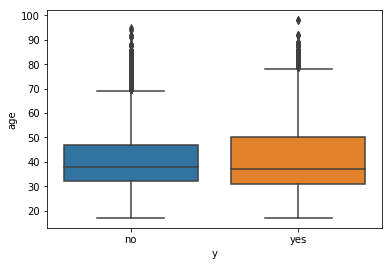

In [11]:
# age
sns.boxplot(x='y', y='age', data=dataset)

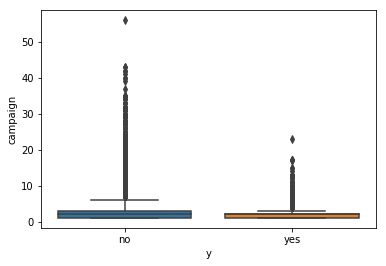

In [13]:
# campaign
sns.boxplot(x='y', y='campaign', data=dataset)

In [89]:
# Fixing campaign column
dataset_new = dataset
min_val = dataset_new["campaign"].min()
max_val = 20
dataset_new = set_outliers(df=dataset_new, column='campaign' , minimum=min_val, maximum=max_val)

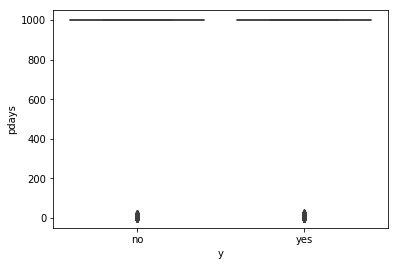

In [14]:
# pdays
sns.boxplot(x='y', y='pdays', data=dataset)

In [90]:
# Fixing pdays column
dataset_new = dataset
min_val = dataset_new["pdays"].min()
max_val = 200
dataset_new = set_outliers(df=dataset_new, column='pdays' , minimum=min_val, maximum=max_val)

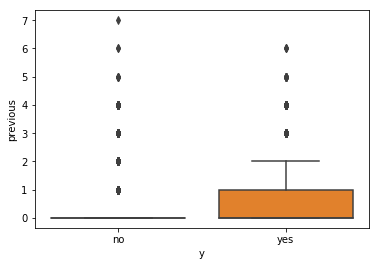

In [15]:
# previous
sns.boxplot(x='y', y='previous', data=dataset)

In [91]:
# Fixing previous column
dataset_new = dataset
min_val = dataset_new["previous"].min()
max_val = 2
dataset_new = set_outliers(df=dataset_new, column='previous' , minimum=min_val, maximum=max_val)

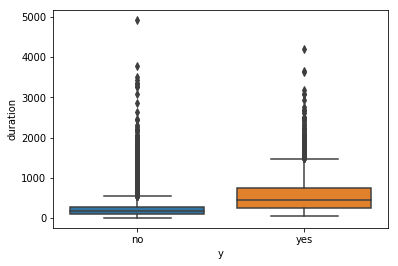

In [18]:
# duration
sns.boxplot(x='y', y='duration', data=dataset)

In [92]:
# Fixing duration column
dataset_new = dataset
min_val = dataset_new["duration"].min()
max_val = 2500
dataset_new = set_outliers(df=dataset_new, column='duration' , minimum=min_val, maximum=max_val)

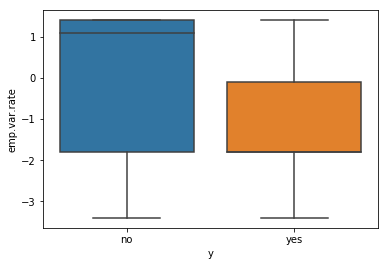

In [19]:
# emp.var.rate
sns.boxplot(x='y', y='emp.var.rate', data=dataset)

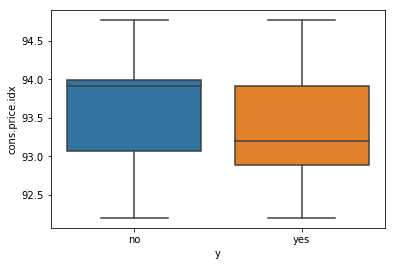

In [20]:
# cons.price.idx
sns.boxplot(x='y', y='cons.price.idx', data=dataset)

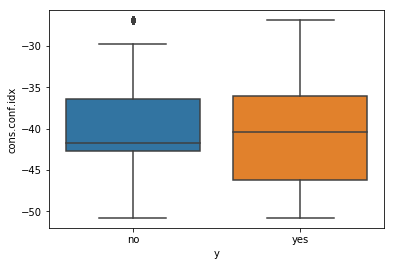

In [21]:
# cons.conf.idx
sns.boxplot(x='y', y='cons.conf.idx', data=dataset)

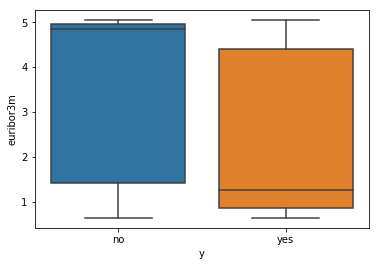

In [22]:
# euribor3m
sns.boxplot(x='y', y='euribor3m', data=dataset)

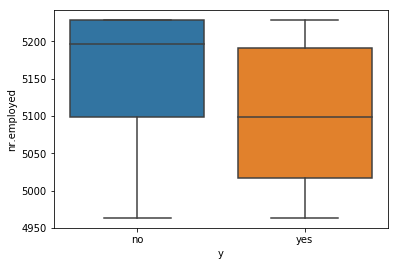

In [23]:
#nr.employed
sns.boxplot(x='y', y='nr.employed', data=dataset)

Lets, have a look on the new dataset values, by adjusting the range casued by outliers

In [30]:
dataset_new.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,256.563000,2.475117,927.294374,0.148651,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,248.913974,2.300843,180.035954,0.402608,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,962.475454,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,962.475454,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,962.475454,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,2486.000000,20.000000,962.475454,2.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Analysis of Indepedent Categorical Variables
1. If any Categorical variable has more than 50% unknown values or seems highly unbalanced, we can drop that variable from dataset.
2. If unknown values are less than 50% than we can replace them by Mode of respective variable by implementing following 'set_unknowns' function.

In [94]:
# set unknowns function
def set_unknowns(df, column):
    col_values = df[column].values
    df[column] = np.where(col_values=='unknown', dataset[column].mode(), col_values)
    return df

job
admin.           25.303486
blue-collar      22.467709
entrepreneur      3.535010
housemaid         2.573565
management        7.099155
retired           4.175974
self-employed     3.450034
services          9.636302
student           2.124405
technician       16.371273
unemployed        2.461882
unknown           0.801204
dtype: float64


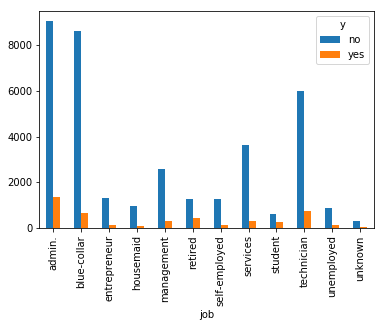

In [34]:
# job
temp1 = pd.crosstab(dataset['job'], dataset['y'])
temp1.plot(kind='bar')
print(dataset.groupby(['job']).size()/len(dataset)*100)

In [95]:
# Fixing 'job' column
dataset_new = set_unknowns(df=dataset_new, column='job')

marital
divorced    11.197436
married     60.522482
single      28.085850
unknown      0.194231
dtype: float64


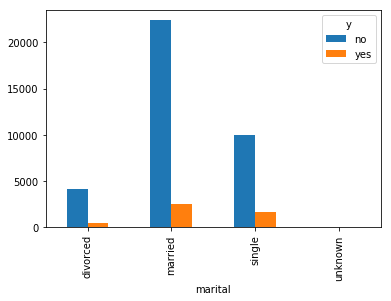

In [37]:
# marital
temp1 = pd.crosstab(dataset['marital'], dataset['y'])
temp1.plot(kind='bar')
print(dataset.groupby(['marital']).size()/len(dataset)*100)

education
basic.4y               10.138875
basic.6y                5.564728
basic.9y               14.676605
high.school            23.101389
illiterate              0.043702
professional.course    12.729436
university.degree      29.542585
unknown                 4.202680
dtype: float64


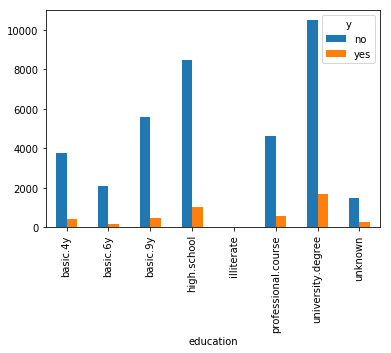

In [38]:
# education
temp1 = pd.crosstab(dataset['education'], dataset['y'])
temp1.plot(kind='bar')
print(dataset.groupby(['education']).size()/len(dataset)*100)

In [96]:
# Fixing 'education' column
dataset_new = set_unknowns(df=dataset_new, column='education')

default
no         79.120132
unknown    20.872584
yes         0.007284
dtype: float64


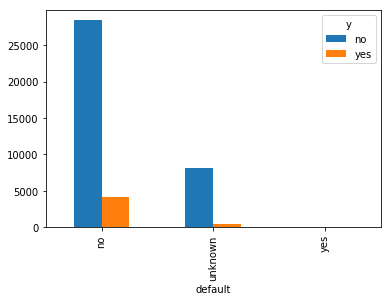

In [40]:
# default
temp1 = pd.crosstab(dataset['default'], dataset['y'])
temp1.plot(kind='bar')
print(dataset.groupby(['default']).size()/len(dataset)*100)

As "NO" seems much higher than "Yes", thus we can delete it because of skewed value

In [44]:
del dataset_new['default']

housing
no         45.212198
unknown     2.403613
yes        52.384190
dtype: float64


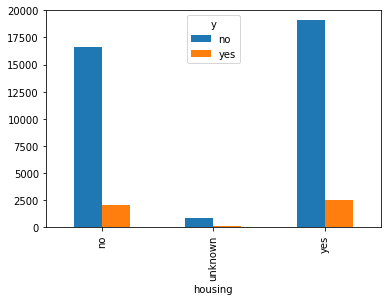

In [45]:
# housing
temp1 = pd.crosstab(dataset['housing'], dataset['y'])
temp1.plot(kind='bar')
print(dataset.groupby(['housing']).size()/len(dataset)*100)

In [98]:
# Fixing housing column
dataset_new = set_unknowns(df=dataset_new, column='housing')

loan
no         82.426920
unknown     2.403613
yes        15.169467
dtype: float64


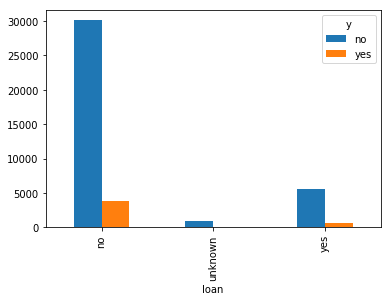

In [49]:
# loan
temp1 = pd.crosstab(dataset['loan'], dataset['y'])
temp1.plot(kind='bar')
print(dataset.groupby(['loan']).size()/len(dataset)*100)

In [99]:
# Fixing loan column
dataset_new = set_unknowns(df=dataset_new, column='loan')

contact
cellular     63.474798
telephone    36.525202
dtype: float64


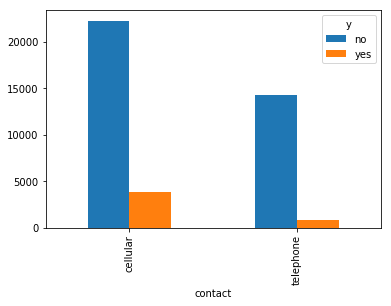

In [100]:
#contact
temp1 = pd.crosstab(dataset['contact'], dataset['y'])
temp1.plot(kind='bar')
print(dataset.groupby(['contact']).size()/len(dataset)*100)

month
apr     6.390211
aug    14.999514
dec     0.441876
jul    17.417694
jun    12.911528
mar     1.325629
may    33.429640
nov     9.956784
oct     1.743226
sep     1.383898
dtype: float64


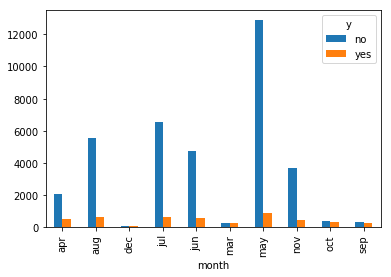

In [52]:
#month
temp1 = pd.crosstab(dataset['month'], dataset['y'])
temp1.plot(kind='bar')
print(dataset.groupby(['month']).size()/len(dataset)*100)

day_of_week
fri    19.003108
mon    20.671069
thu    20.935709
tue    19.641643
wed    19.748470
dtype: float64


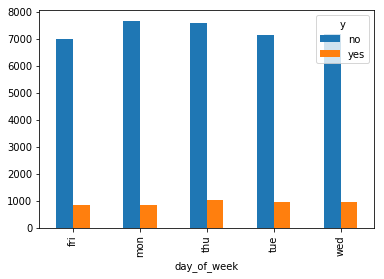

In [53]:
# day_of_week
temp1 = pd.crosstab(dataset['day_of_week'], dataset['y'])
temp1.plot(kind='bar')
print(dataset.groupby(['day_of_week']).size()/len(dataset)*100)

poutcome
failure        10.323395
nonexistent    86.343110
success         3.333495
dtype: float64


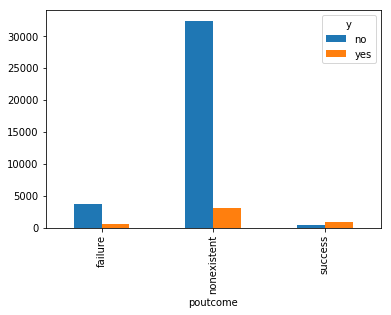

In [54]:
#"poutcome"
temp8 = pd.crosstab(dataset['poutcome'], dataset['y'])
temp8.plot(kind='bar')
print(dataset.groupby(['poutcome']).size()/len(dataset)*100)

## Updated dataset after EDA: Exploratory Data Analysis

In [57]:
dataset_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null float64
campaign          41188 non-null float64
pdays             41188 non-null float64
previous          41188 non-null float64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(9), int64(1), object(10)
memory usage: 6.3+ MB


Now total 20 variables are present since we remove one column as above

In [65]:
#Seperating Target variable from other variables
dataset_Y = dataset_new['y']
dataset_X = dataset_new[dataset_new.columns[0:19]]

In [66]:
dataset_X.head()

,age,job,marital,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,telephone,may,mon,261.0,1.0,962.475454,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,57,services,married,high.school,no,no,telephone,may,mon,149.0,1.0,962.475454,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,yes,no,telephone,may,mon,226.0,1.0,962.475454,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,telephone,may,mon,151.0,1.0,962.475454,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,yes,telephone,may,mon,307.0,1.0,962.475454,0.0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [68]:
dataset_Y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

In [70]:
#converting Categorical into Numeriacal by creating Dummy variables
dataset_X_dummy = pd.get_dummies(dataset_X)

In [72]:
dataset_X_dummy.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261.0,1.0,962.475454,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149.0,1.0,962.475454,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226.0,1.0,962.475454,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151.0,1.0,962.475454,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307.0,1.0,962.475454,0.0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


### Now we have 56 columns, we will see how many variables are explaining actual data

Take all models for comapring accuracy

In [73]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('K-NN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [79]:
#converting dataframe into numpy Array
X = dataset_X_dummy.values
Y = dataset_Y.values

# Split-out validation dataset
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [80]:
#Scaling the values
X_t = scale(X_train)

#initially lets create 56 components which is actual number of Variables we have
pca = PCA(n_components=56)

pca.fit(X_t)

#The amount of variance that each PC explains
var= pca.explained_variance_ratio_

#Cumulative Variance explains
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

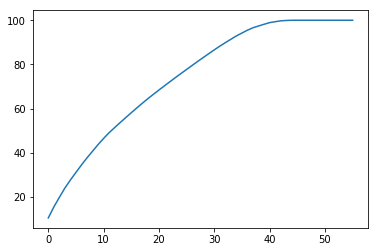

In [81]:
plt.plot(var1)

# From Cumulative Variance plot we can find that first 39 components are explaining nearly 100% variability of actual data.
### So we will proceed with only 39 components for further modelling

In [82]:
pca = PCA(n_components=39)
pca.fit(X_t)
X_train_PC=pca.fit_transform(X_t)

## Evaluate Models

In [83]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=7)
    cv_results = model_selection.cross_val_score(model, X_train_PC, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.908255 (0.005926)
LDA: 0.904704 (0.005319)
K-NN: 0.896115 (0.005077)
CART: 0.873505 (0.005650)
NB: 0.858392 (0.005217)
SVM: 0.906434 (0.005983)


# "Logistic Regression" is  fastest and has the highest accuracy of 90.825% 


Now lets compare the algorithms by boxplot, as it easily distinguish the algorithms by visualization

[Text(0,0,'LR'),
 Text(0,0,'LDA'),
 Text(0,0,'K-NN'),
 Text(0,0,'CART'),
 Text(0,0,'NB'),
 Text(0,0,'SVM')]

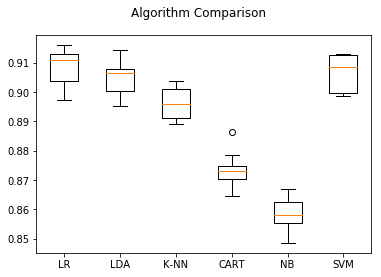

In [84]:
# Comparing Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)

# Making Predictions

In [85]:
#Scaling the X_validation data
X_v = scale(X_validation)

pca.fit(X_v)
X_validation_PC=pca.fit_transform(X_v)

In [86]:
# Make predictions on validation dataset by choosing best Algorithm
lr = LogisticRegression()
lr.fit(X_train_PC, Y_train)
predictions = lr.predict(X_validation_PC)

In [87]:
print("Accuracy : ", accuracy_score(Y_validation, predictions))

Accuracy :  0.8935421218742413


###  Thus, our model will predict the output with nearly 90% accuracy

## Final Analysis given  to the Marketing Team

1. Cellular in Contact leads to more negative impact
2. No. of employees is less for output "yes"
3. Pdays is less for output "Yes"
4. Months like May,June,July,August,November have negative impact on output